In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_tgt_g_salary_19-20')

In [3]:
tes.dtypes

NAME           object
TGT/G         float64
TGT/G_rank    float64
salary          int64
dtype: object

In [4]:
tes.head()

,NAME,TGT/G,TGT/G_rank,salary
0,Zach Ertz,9.0,1.0,8500000
1,Travis Kelce,8.5,2.5,9368400
2,Evan Engram,8.5,2.5,2679576
3,Darren Waller,7.3,6.0,7450000
4,Mark Andrews,6.8,7.0,863290


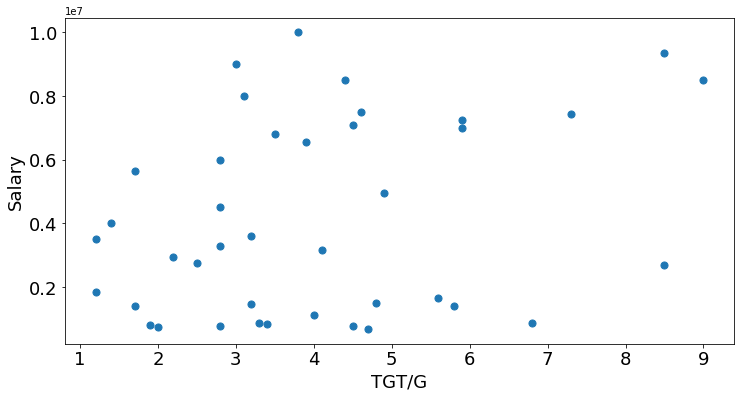

In [5]:
ax = tes.plot(kind="scatter", x = 'TGT/G',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('TGT/G', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(tes.loc[:, ['TGT/G', 'salary']])

In [7]:
X.mean(axis = 0)

array([3.33066907e-16, 1.11022302e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 1.33463359, -0.84749678],
       [-0.99908299, -0.41984232],
       [ 0.08157496,  1.0823144 ],
       [-0.08241594, -0.98529669],
       [ 2.13776848,  1.43599748]])

In [11]:
km.predict(X)

array([4, 4, 0, 4, 0, 2, 2, 0, 0, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3,
       3, 1, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [12]:
tes['clusters'] = km.labels_
tes.head()

,NAME,TGT/G,TGT/G_rank,salary,clusters
0,Zach Ertz,9.0,1.0,8500000,4
1,Travis Kelce,8.5,2.5,9368400,4
2,Evan Engram,8.5,2.5,2679576,0
3,Darren Waller,7.3,6.0,7450000,4
4,Mark Andrews,6.8,7.0,863290,0


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[6.67500000e+00, 1.65047875e+06],
       [2.05000000e+00, 2.92192533e+06],
       [4.19166667e+00, 7.38794217e+06],
       [3.86666667e+00, 1.24079000e+06],
       [8.26666667e+00, 8.43946667e+06]])

In [14]:
tes.groupby('clusters')[['TGT/G', 'salary']].mean()

,TGT/G,salary
clusters,,
0,6.675000,1.650479e+06
1,2.050000,2.921925e+06
2,4.191667,7.387942e+06
3,3.866667,1.240790e+06
4,8.266667,8.439467e+06


In [15]:
centroids = tes.groupby('clusters')[['TGT/G', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

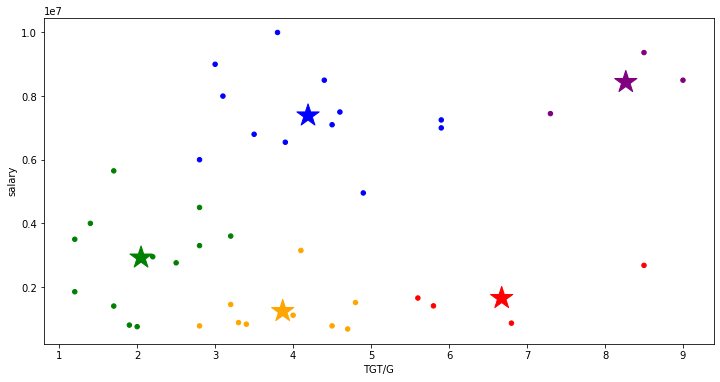

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
tes['color'] = tes['clusters'].map(lambda p: colors[p])

ax = tes.plot(    
    kind = 'scatter', 
    x = 'TGT/G', y = 'salary',
    figsize = (12,6),
    c = tes['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'TGT/G', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

13.077243448091984

In [18]:
silhouette_score(X, km.labels_)

0.4106685827736394